In [ ]:
# Data dummy pemain sepak bola
players = {
    "Wojciech Szczesny": {
        "GoalKeeping": "ya",  "Defending": "tidak", "Endurance": "tidak",
        "Dribbling": "tidak", "Crossing":  "tidak", "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Inigo Martinez": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "tidak",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Pau Cubarsi": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "tidak",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Alejandro Balde": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "ya",
        "Dribbling":  "ya",  "Crossing":  "ya",   "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Jules Kounde": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "ya",   "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Pedri Gonzalez": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "ya",
        "Passing":    "ya",  "Shooting":  "tidak"
    },
    "Frenkie de Jong": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "ya",
        "Passing":    "ya",  "Shooting":  "tidak"
    },
    "Dani Olmo": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "ya",
        "Passing":    "ya",  "Shooting":  "ya"
    },
    "Lamine Yamal": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "ya",  "Crossing":  "ya",   "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "ya"
    },
    "Raphinha": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "ya",  "Crossing":  "ya",   "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "ya"
    },
    "Robert Lewandowski": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "ya",
        "Passing":    "tidak","Shooting":  "ya"
    },
    "Ivan Cahya Aryasuta": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "tidak",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    }
}

In [ ]:
#Decison Tree
def predict_position(attr: dict) -> str:
    if attr["GoalKeeping"] == "ya":
        return "GK"
    elif attr["Defending"] == "ya":
        if attr["Endurance"]  =="ya":
            if attr ["Crossing"] == "ya":
                return "LB/RB"
            elif attr["Avg"] == "ya" and attr["Passing"] == "ya":
                return "CDM"
            else:
                return "CB"
        return "CB"
    elif attr["Avg"] == "ya":
        if attr["Passing"] == "ya":
            if attr["Shooting"] == "ya":
                return "CAM"
            elif attr["Defending"] == "ya":
                return "CDM"
            return "CMF"
        return "CF"
    elif attr["Dribbling"] == "ya" and attr["Crossing"] == "ya":
        return "RWF/LWF"
    else:
        return "unknown"

In [ ]:
#prediksi posisi tiap pemain
for name, stats in players.items():
    print(f"{name:20s}: {predict_position(stats)}")

Wojciech Szczesny   : GK
Inigo Martinez      : CB
Pau Cubarsi         : CB
Alejandro Balde     : LB/RB
Jules Kounde        : LB/RB
Pedri Gonzalez      : CMF
Frenkie de Jong     : CDM
Dani Olmo           : CAM
Lamine Yamal        : RWF/LWF
Raphinha            : RWF/LWF
Robert Lewandowski  : CF
Ivan Cahya Aryasuta : unknown


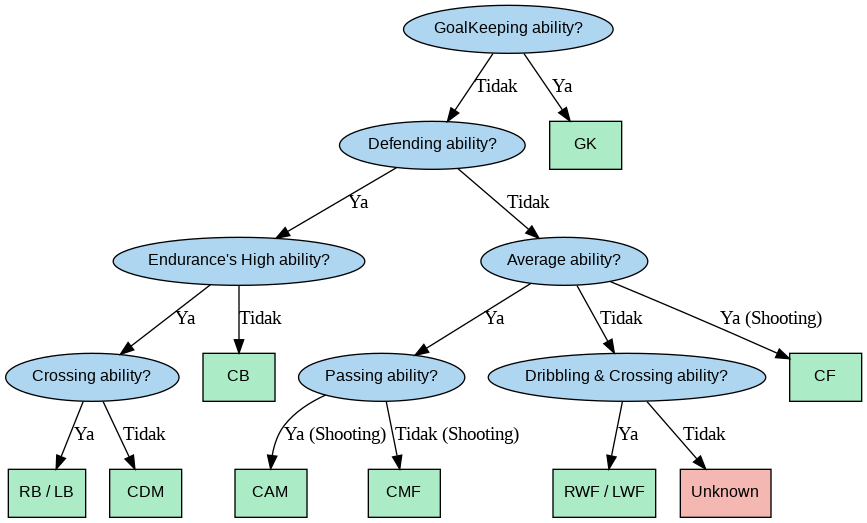

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

dot = Digraph("PosisiPemainTree", format="png")
dot.attr(rankdir="TB", size="10,10")
dot.attr("node", style ='filled', fontname='Arial', fontsize='12', color='black')

warna_atribut= "#AED6F1"
warna_keputusan= "#ABEBC6"
warna_tidak_diketahui= "#F5B7B1"

dot.node("A", "GoalKeeping ability?", fillcolor=warna_atribut)
dot.node("C", "Defending ability?", fillcolor=warna_atribut)
dot.node("D", "Endurance's High ability?", fillcolor=warna_atribut)
dot.node("F", "Crossing ability?", fillcolor=warna_atribut)
dot.node("I", "Average ability?", fillcolor=warna_atribut)
dot.node("J", "Passing ability?", fillcolor=warna_atribut)
dot.node("N", "Dribbling & Crossing ability?", fillcolor=warna_atribut)

dot.node("B", "GK", fillcolor=warna_keputusan, shape="box")
dot.node("E", "CB", fillcolor=warna_keputusan, shape="box")
dot.node("G", "RB / LB", fillcolor=warna_keputusan, shape="box")
dot.node("H", "CDM", fillcolor=warna_keputusan, shape="box")
dot.node("K", "CAM", fillcolor=warna_keputusan, shape="box")
dot.node("L", "CMF", fillcolor=warna_keputusan, shape="box")
dot.node("M", "CF", fillcolor=warna_keputusan, shape="box")
dot.node("O", "RWF / LWF", fillcolor=warna_keputusan, shape="box")
dot.node("P", "Unknown", fillcolor=warna_tidak_diketahui, shape="box")

dot.edge("A", "B", label="Ya", taillabel=" ")
dot.edge("A", "C", label="Tidak", taillabel=" ")

dot.edge("C", "D", label="Ya", taillabel=" ")
dot.edge("C", "I", label="Tidak", taillabel=" ")

dot.edge("D", "F", label="Ya", taillabel=" ")
dot.edge("D", "E", label="Tidak", taillabel=" ")

dot.edge("F", "G", label="Ya", taillabel=" ")
dot.edge("F", "H", label="Tidak", taillabel=" ")

dot.edge("I", "J", label="Ya", taillabel=" ")
dot.edge("I", "N", label="Tidak", taillabel=" ")

dot.edge("J", "K", label="Ya (Shooting)", taillabel=" ")
dot.edge("J", "L", label="Tidak (Shooting)", taillabel=" ")

dot.edge("I", "M", label="Ya (Shooting)", taillabel=" ")

dot.edge("N", "O", label="Ya", taillabel=" ")
dot.edge("N", "P", label="Tidak", taillabel=" ")

img_bytes = dot.pipe(format='png')
display(Image(img_bytes))


Membuat visualisasi Decision Tree untuk klasifikasi posisi pemain sepak bola...
DECISION TREE STRUCTURE - FOOTBALL POSITION CLASSIFIER

    GoalKeeping?
    ├── Ya → GK
    └── Tidak → Defending?
        ├── Ya → Endurance?
        │   ├── Ya → Crossing?
        │   │   ├── Ya → RB/LB
        │   │   └── Tidak → CDM (if Avg=Ya & Passing=Ya)
        │   │               └── CB (otherwise)
        │   └── Tidak → CB
        └── Tidak → Average?
            ├── Ya → Passing?
            │   ├── Ya → Shooting?
            │   │   ├── Ya → CAM
            │   │   └── Tidak → Defending?
            │   │       ├── Ya → CDM
            │   │       └── Tidak → CMF
            │   └── Tidak → CF
            └── Tidak → Dribbling & Crossing?
                ├── Ya → RWF/LWF
                └── Tidak → Unknown
    

1. Membuat visualisasi dengan Matplotlib...


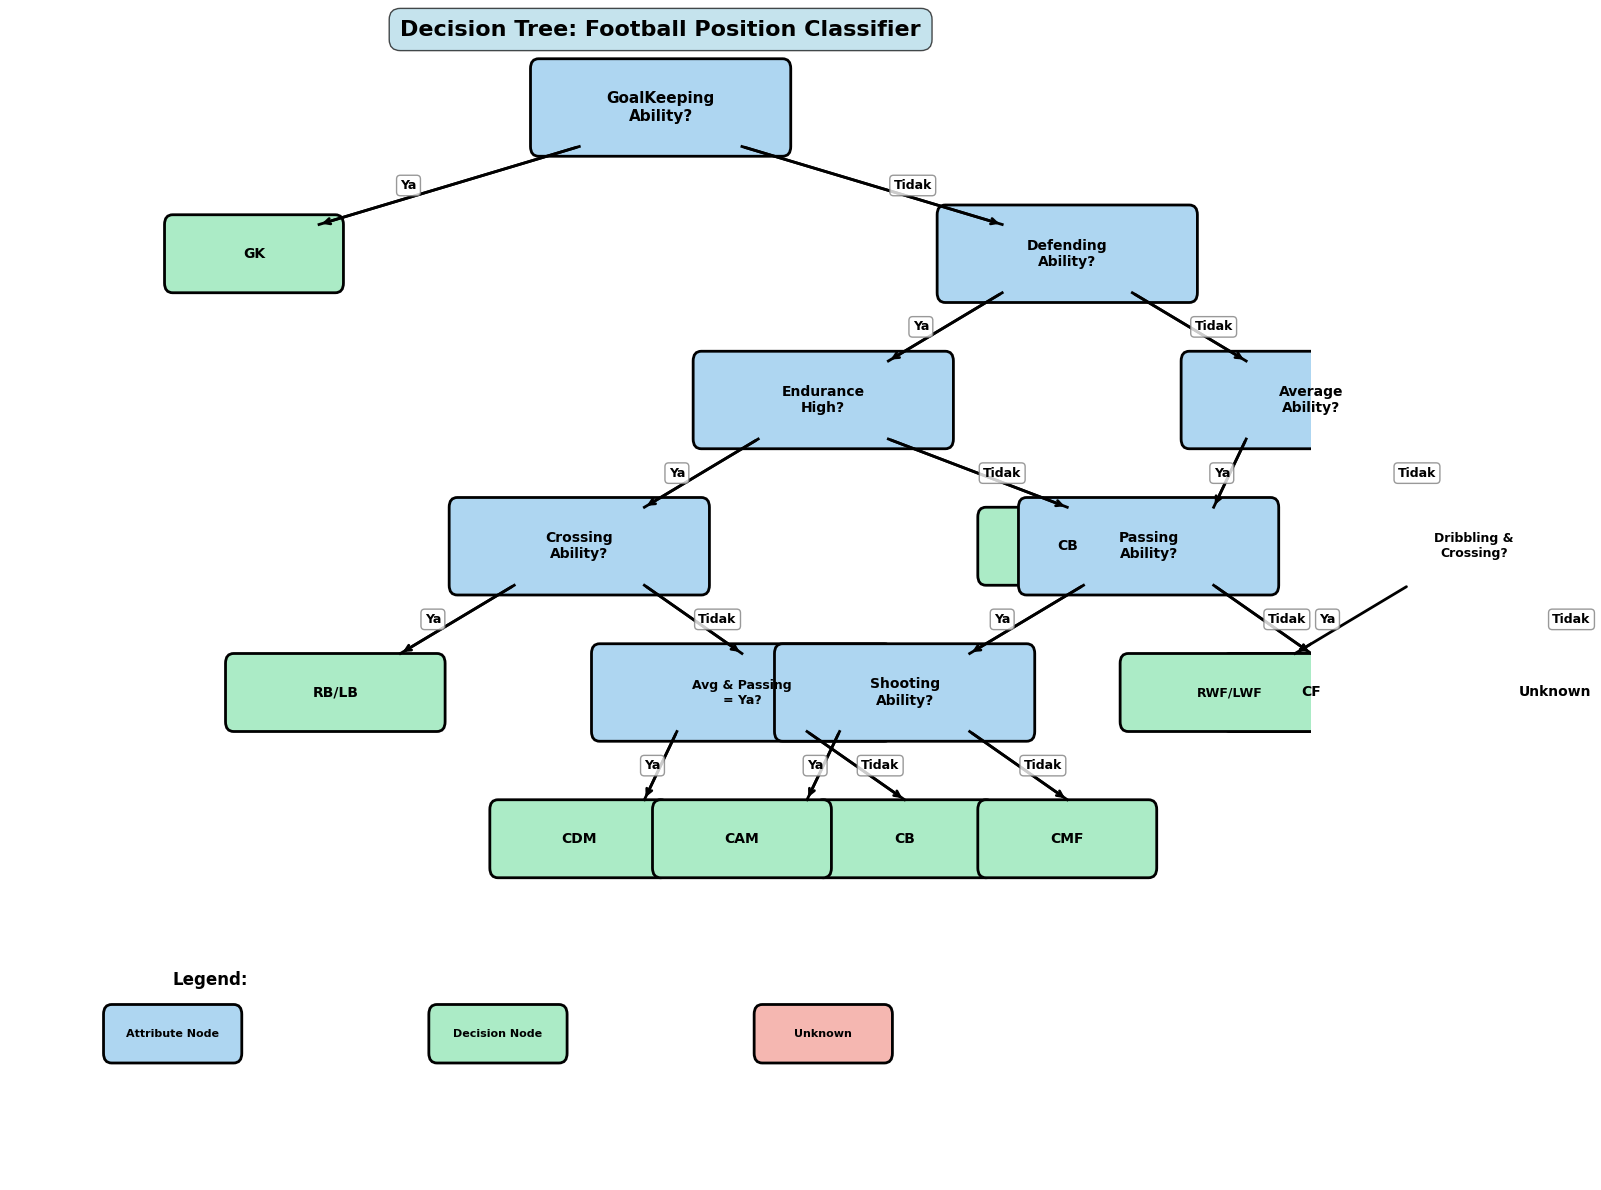


2. Membuat visualisasi dengan NetworkX...


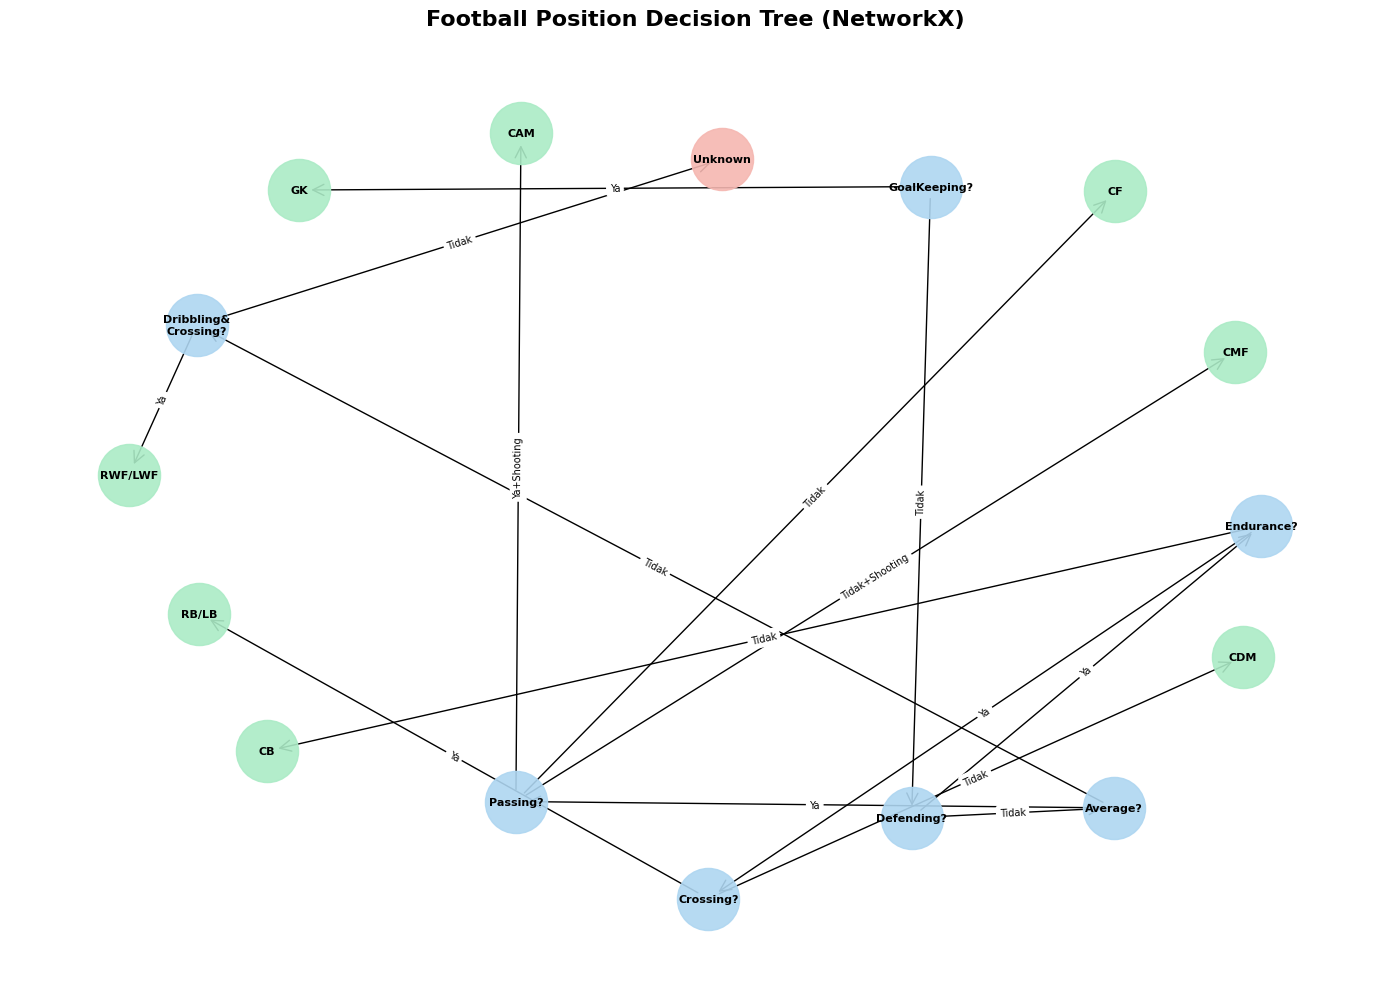


Visualisasi selesai!

TESTING DECISION TREE
Pemain 1 (Goalkeeper): GK
Pemain 2 (Center Back): CB
Pemain 3 (Full Back): LB/RB
Pemain 4 (Attacking Midfielder): CAM
Pemain 5 (Winger): RWF/LWF

Selesai!


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np

# Fungsi untuk membuat visualisasi decision tree yang lebih jelas
def create_enhanced_decision_tree():
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')

    # Warna untuk berbagai jenis node
    colors = {
        'attribute': '#AED6F1',  # Biru muda
        'decision': '#ABEBC6',   # Hijau muda
        'unknown': '#F5B7B1'     # Merah muda
    }

    # Fungsi untuk membuat node
    def create_node(x, y, width, height, text, node_type, fontsize=10):
        # Membuat kotak dengan sudut melengkung
        box = FancyBboxPatch(
            (x-width/2, y-height/2), width, height,
            boxstyle="round,pad=0.1",
            facecolor=colors[node_type],
            edgecolor='black',
            linewidth=2
        )
        ax.add_patch(box)

        # Menambahkan teks
        ax.text(x, y, text, ha='center', va='center',
                fontsize=fontsize, fontweight='bold', wrap=True)

    # Fungsi untuk membuat garis penghubung dengan label
    def create_edge(x1, y1, x2, y2, label, offset_x=0, offset_y=0):
        # Garis penghubung
        ax.plot([x1, x2], [y1, y2], 'k-', linewidth=2)

        # Panah
        dx = x2 - x1
        dy = y2 - y1
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))

        # Label pada garis
        mid_x = (x1 + x2) / 2 + offset_x
        mid_y = (y1 + y2) / 2 + offset_y
        ax.text(mid_x, mid_y, label, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white',
                         edgecolor='gray', alpha=0.8),
                fontsize=9, fontweight='bold')

    # LEVEL 1: Root Node
    create_node(8, 11, 3, 0.8, 'GoalKeeping\nAbility?', 'attribute', 11)

    # LEVEL 2
    create_node(3, 9.5, 2, 0.6, 'GK', 'decision', 10)
    create_node(13, 9.5, 3, 0.8, 'Defending\nAbility?', 'attribute', 10)

    # Edges Level 1 -> 2
    create_edge(7, 10.6, 3.8, 9.8, 'Ya', -0.5, 0)
    create_edge(9, 10.6, 12.2, 9.8, 'Tidak', 0.5, 0)

    # LEVEL 3
    create_node(10, 8, 3, 0.8, 'Endurance\nHigh?', 'attribute', 10)
    create_node(16, 8, 3, 0.8, 'Average\nAbility?', 'attribute', 10)

    # Edges Level 2 -> 3
    create_edge(12.2, 9.1, 10.8, 8.4, 'Ya', -0.3, 0)
    create_edge(13.8, 9.1, 15.2, 8.4, 'Tidak', 0.3, 0)

    # LEVEL 4
    create_node(7, 6.5, 3, 0.8, 'Crossing\nAbility?', 'attribute', 10)
    create_node(13, 6.5, 2, 0.6, 'CB', 'decision', 10)
    create_node(14, 6.5, 3, 0.8, 'Passing\nAbility?', 'attribute', 10)
    create_node(18, 6.5, 3.5, 0.8, 'Dribbling &\nCrossing?', 'attribute', 9)

    # Edges Level 3 -> 4
    create_edge(9.2, 7.6, 7.8, 6.9, 'Ya', -0.3, 0)
    create_edge(10.8, 7.6, 13, 6.9, 'Tidak', 0.3, 0)
    create_edge(15.2, 7.6, 14.8, 6.9, 'Ya', -0.1, 0)
    create_edge(16.8, 7.6, 17.2, 6.9, 'Tidak', 0.3, 0)

    # LEVEL 5
    create_node(4, 5, 2.5, 0.6, 'RB/LB', 'decision', 10)
    create_node(9, 5, 3.5, 0.8, 'Avg & Passing\n= Ya?', 'attribute', 9)
    create_node(11, 5, 3, 0.8, 'Shooting\nAbility?', 'attribute', 10)
    create_node(16, 5, 2, 0.6, 'CF', 'decision', 10)
    create_node(15, 5, 2.5, 0.6, 'RWF/LWF', 'decision', 9)
    create_node(19, 5, 2.5, 0.6, 'Unknown', 'unknown', 10)

    # Edges Level 4 -> 5
    create_edge(6.2, 6.1, 4.8, 5.4, 'Ya', -0.3, 0)
    create_edge(7.8, 6.1, 9, 5.4, 'Tidak', 0.3, 0)
    create_edge(13.2, 6.1, 11.8, 5.4, 'Ya', -0.3, 0)
    create_edge(14.8, 6.1, 16, 5.4, 'Tidak', 0.3, 0)
    create_edge(17.2, 6.1, 15.8, 5.4, 'Ya', -0.3, 0)
    create_edge(18.8, 6.1, 19, 5.4, 'Tidak', 0.3, 0)

    # LEVEL 6 (Final decisions)
    create_node(7, 3.5, 2, 0.6, 'CDM', 'decision', 10)
    create_node(11, 3.5, 2, 0.6, 'CB', 'decision', 10)
    create_node(9, 3.5, 2, 0.6, 'CAM', 'decision', 10)
    create_node(13, 3.5, 2, 0.6, 'CMF', 'decision', 10)

    # Edges Level 5 -> 6
    create_edge(8.2, 4.6, 7.8, 3.9, 'Ya', -0.1, 0)
    create_edge(9.8, 4.6, 11, 3.9, 'Tidak', 0.3, 0)
    create_edge(10.2, 4.6, 9.8, 3.9, 'Ya', -0.1, 0)
    create_edge(11.8, 4.6, 13, 3.9, 'Tidak', 0.3, 0)

    # Judul
    ax.text(8, 11.8, 'Decision Tree: Football Position Classifier',
            ha='center', va='center', fontsize=16, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.7))

    # Legend
    legend_y = 1.5
    ax.text(2, legend_y + 0.5, 'Legend:', fontsize=12, fontweight='bold')

    # Legend items
    legend_items = [
        ('Attribute Node', 'attribute'),
        ('Decision Node', 'decision'),
        ('Unknown', 'unknown')
    ]

    for i, (label, node_type) in enumerate(legend_items):
        x_pos = 2 + i * 4
        create_node(x_pos, legend_y, 1.5, 0.4, label, node_type, 8)

    plt.tight_layout()
    plt.show()

# Fungsi untuk membuat visualisasi dengan NetworkX (alternatif)
def create_networkx_tree():
    try:
        import networkx as nx
        from networkx.drawing.nx_agraph import graphviz_layout
    except ImportError:
        print("NetworkX tidak terinstall. Menggunakan visualisasi matplotlib saja.")
        return

    # Membuat graph
    G = nx.DiGraph()

    # Menambahkan nodes
    nodes = {
        'A': 'GoalKeeping?',
        'B': 'GK',
        'C': 'Defending?',
        'D': 'Endurance?',
        'E': 'CB',
        'F': 'Crossing?',
        'G': 'RB/LB',
        'H': 'CDM',
        'I': 'Average?',
        'J': 'Passing?',
        'K': 'CAM',
        'L': 'CMF',
        'M': 'CF',
        'N': 'Dribbling&Crossing?',
        'O': 'RWF/LWF',
        'P': 'Unknown'
    }

    # Menambahkan edges dengan labels
    edges = [
        ('A', 'B', 'Ya'),
        ('A', 'C', 'Tidak'),
        ('C', 'D', 'Ya'),
        ('C', 'I', 'Tidak'),
        ('D', 'F', 'Ya'),
        ('D', 'E', 'Tidak'),
        ('F', 'G', 'Ya'),
        ('F', 'H', 'Tidak'),
        ('I', 'J', 'Ya'),
        ('I', 'N', 'Tidak'),
        ('J', 'K', 'Ya+Shooting'),
        ('J', 'L', 'Tidak+Shooting'),
        ('J', 'M', 'Tidak'),
        ('N', 'O', 'Ya'),
        ('N', 'P', 'Tidak')
    ]

    G.add_nodes_from(nodes.keys())
    G.add_edges_from([(e[0], e[1]) for e in edges])

    # Membuat layout
    pos = nx.spring_layout(G, k=3, iterations=50)

    # Plotting
    plt.figure(figsize=(14, 10))

    # Menggambar nodes dengan warna berbeda
    decision_nodes = ['B', 'E', 'G', 'H', 'K', 'L', 'M', 'O']
    unknown_nodes = ['P']
    attribute_nodes = [n for n in nodes.keys() if n not in decision_nodes + unknown_nodes]

    nx.draw_networkx_nodes(G, pos, nodelist=attribute_nodes,
                          node_color='#AED6F1', node_size=2000, alpha=0.9)
    nx.draw_networkx_nodes(G, pos, nodelist=decision_nodes,
                          node_color='#ABEBC6', node_size=2000, alpha=0.9)
    nx.draw_networkx_nodes(G, pos, nodelist=unknown_nodes,
                          node_color='#F5B7B1', node_size=2000, alpha=0.9)

    # Menggambar edges
    nx.draw_networkx_edges(G, pos, edge_color='black', arrows=True,
                          arrowsize=20, arrowstyle='->')

    # Menambahkan labels untuk nodes
    node_labels = {k: v.replace('&', '&\n') for k, v in nodes.items()}
    nx.draw_networkx_labels(G, pos, node_labels, font_size=8, font_weight='bold')

    # Menambahkan labels untuk edges
    edge_labels = {(e[0], e[1]): e[2] for e in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)

    plt.title('Football Position Decision Tree (NetworkX)',
              fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fungsi untuk membuat tree text representation
def print_tree_structure():
    """Mencetak struktur tree dalam format teks yang rapi"""
    print("=" * 60)
    print("DECISION TREE STRUCTURE - FOOTBALL POSITION CLASSIFIER")
    print("=" * 60)

    tree_structure = """
    GoalKeeping?
    ├── Ya → GK
    └── Tidak → Defending?
        ├── Ya → Endurance?
        │   ├── Ya → Crossing?
        │   │   ├── Ya → RB/LB
        │   │   └── Tidak → CDM (if Avg=Ya & Passing=Ya)
        │   │               └── CB (otherwise)
        │   └── Tidak → CB
        └── Tidak → Average?
            ├── Ya → Passing?
            │   ├── Ya → Shooting?
            │   │   ├── Ya → CAM
            │   │   └── Tidak → Defending?
            │   │       ├── Ya → CDM
            │   │       └── Tidak → CMF
            │   └── Tidak → CF
            └── Tidak → Dribbling & Crossing?
                ├── Ya → RWF/LWF
                └── Tidak → Unknown
    """
    print(tree_structure)

# Fungsi utama untuk menjalankan semua visualisasi
def main():
    print("Membuat visualisasi Decision Tree untuk klasifikasi posisi pemain sepak bola...")

    # 1. Cetak struktur tree
    print_tree_structure()

    # 2. Visualisasi dengan matplotlib (enhanced)
    print("\n1. Membuat visualisasi dengan Matplotlib...")
    create_enhanced_decision_tree()

    # 3. Visualisasi dengan NetworkX (jika tersedia)
    print("\n2. Membuat visualisasi dengan NetworkX...")
    create_networkx_tree()

    print("\nVisualisasi selesai!")

# Jalankan program
if __name__ == "__main__":
    main()

# Fungsi predict_position untuk testing
def predict_position(attr: dict) -> str:
    """
    Fungsi untuk memprediksi posisi pemain berdasarkan atribut
    """
    if attr["GoalKeeping"] == "ya":
        return "GK"
    elif attr["Defending"] == "ya":
        if attr["Endurance"] == "ya":
            if attr["Crossing"] == "ya":
                return "LB/RB"
            elif attr["Avg"] == "ya" and attr["Passing"] == "ya":
                return "CDM"
            else:
                return "CB"
        return "CB"
    elif attr["Avg"] == "ya":
        if attr["Passing"] == "ya":
            if attr["Shooting"] == "ya":
                return "CAM"
            elif attr["Defending"] == "ya":
                return "CDM"
            return "CMF"
        return "CF"
    elif attr["Dribbling"] == "ya" and attr["Crossing"] == "ya":
        return "RWF/LWF"
    else:
        return "unknown"

# Contoh penggunaan dan testing
print("\n" + "="*50)
print("TESTING DECISION TREE")
print("="*50)

# Test cases
test_cases = [
    {
        "name": "Pemain 1 (Goalkeeper)",
        "attr": {"GoalKeeping": "ya", "Defending": "tidak", "Endurance": "tidak",
                "Crossing": "tidak", "Avg": "tidak", "Passing": "tidak",
                "Shooting": "tidak", "Dribbling": "tidak"}
    },
    {
        "name": "Pemain 2 (Center Back)",
        "attr": {"GoalKeeping": "tidak", "Defending": "ya", "Endurance": "tidak",
                "Crossing": "tidak", "Avg": "tidak", "Passing": "tidak",
                "Shooting": "tidak", "Dribbling": "tidak"}
    },
    {
        "name": "Pemain 3 (Full Back)",
        "attr": {"GoalKeeping": "tidak", "Defending": "ya", "Endurance": "ya",
                "Crossing": "ya", "Avg": "tidak", "Passing": "tidak",
                "Shooting": "tidak", "Dribbling": "tidak"}
    },
    {
        "name": "Pemain 4 (Attacking Midfielder)",
        "attr": {"GoalKeeping": "tidak", "Defending": "tidak", "Endurance": "tidak",
                "Crossing": "tidak", "Avg": "ya", "Passing": "ya",
                "Shooting": "ya", "Dribbling": "tidak"}
    },
    {
        "name": "Pemain 5 (Winger)",
        "attr": {"GoalKeeping": "tidak", "Defending": "tidak", "Endurance": "tidak",
                "Crossing": "ya", "Avg": "tidak", "Passing": "tidak",
                "Shooting": "tidak", "Dribbling": "ya"}
    }
]

for test in test_cases:
    result = predict_position(test["attr"])
    print(f"{test['name']}: {result}")

print("\nSelesai!")